In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('df_CO.csv')

In [4]:
df.head()

,Date,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
0,2011-04-21,33.4,0.5,86,-1,32,11.6,-0.5,27,-2,...,23.3,-0.1,57,-5,38,0.0,0.0,0,0,45
1,2011-04-22,34.2,0.8,93,7,21,10.8,-0.8,25,-2,...,23.8,0.5,61,4,27,0.0,0.0,0,0,41
2,2011-04-23,34.7,0.5,92,-1,22,10.4,-0.4,24,-1,...,23.6,-0.2,60,-1,28,0.0,0.0,0,0,36
3,2011-04-24,35.4,0.7,92,0,26,10.7,0.3,29,5,...,24.2,0.6,64,4,29,0.3,0.3,2,2,37
4,2011-04-25,35.7,0.3,94,2,25,11.5,0.8,35,6,...,24.8,0.6,69,5,26,0.4,0.1,2,0,33


In [5]:
translate = {
    'swe': 'Snow Water Equivalent (in)',
    'cswe': 'Change In Snow Water Equivalent (in)',
    'sd': 'Snow Depth (in)',
    'csd': 'Change In Snow Depth (in)',
    'oat': 'Observed Air Temperature (degrees farenheit)'
}

df.describe()

,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,oat_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,...,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,6.846537,-0.003367,22.525869,-0.006022,28.812757,4.316781,-0.001204,14.969614,-0.002464,30.127840,...,4.961347,-0.003531,17.526964,-0.006844,33.565015,1.477553,0.000219,4.762661,-0.002190,37.798248
std,7.977716,0.352750,23.210940,2.119504,13.002548,5.671325,0.270762,18.709514,1.772290,12.854729,...,6.196143,0.279260,20.136912,1.777370,14.197633,2.526371,0.195121,8.044224,1.679232,12.735388
min,0.000000,-3.100000,0.000000,-7.000000,-20.000000,0.000000,-2.100000,0.000000,-8.000000,-18.000000,...,0.000000,-1.800000,0.000000,-9.000000,-15.000000,0.000000,-2.800000,0.000000,-11.000000,-9.000000
25%,0.000000,0.000000,0.000000,-1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,21.000000,...,0.000000,0.000000,0.000000,-1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,3.700000,0.000000,17.000000,0.000000,30.000000,1.100000,0.000000,3.000000,0.000000,31.000000,...,2.100000,0.000000,8.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,38.000000
75%,12.200000,0.100000,42.000000,0.000000,39.000000,7.800000,0.000000,29.000000,0.000000,41.000000,...,8.600000,0.000000,33.000000,0.000000,46.000000,2.300000,0.000000,8.000000,0.000000,48.000000
max,39.800000,1.900000,95.000000,19.000000,58.000000,23.400000,1.800000,89.000000,22.000000,58.000000,...,27.100000,2.400000,93.000000,17.000000,61.000000,12.700000,3.500000,41.000000,23.000000,64.000000


In [6]:
df.head()

,Date,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
0,2011-04-21,33.4,0.5,86,-1,32,11.6,-0.5,27,-2,...,23.3,-0.1,57,-5,38,0.0,0.0,0,0,45
1,2011-04-22,34.2,0.8,93,7,21,10.8,-0.8,25,-2,...,23.8,0.5,61,4,27,0.0,0.0,0,0,41
2,2011-04-23,34.7,0.5,92,-1,22,10.4,-0.4,24,-1,...,23.6,-0.2,60,-1,28,0.0,0.0,0,0,36
3,2011-04-24,35.4,0.7,92,0,26,10.7,0.3,29,5,...,24.2,0.6,64,4,29,0.3,0.3,2,2,37
4,2011-04-25,35.7,0.3,94,2,25,11.5,0.8,35,6,...,24.8,0.6,69,5,26,0.4,0.1,2,0,33


In [7]:
# get columns with prefix swe
swe = df.filter(regex='^swe', axis=1).copy()
swe.head()

,swe_23,swe_33,swe_36,swe_38,swe_42,swe_45,swe_62,swe_66,swe_67,swe_84,...,swe_807,swe_817,swe_818,swe_821,swe_825,swe_828,swe_829,swe_853,swe_854,swe_866
0,33.4,11.6,6.6,35.3,24.3,39.4,15.2,42.1,42.0,13.6,...,16.3,16.7,11.8,38.6,6.6,33.4,17.1,20.7,23.3,0.0
1,34.2,10.8,5.9,35.1,25.1,40.0,15.4,43.2,42.6,14.0,...,16.1,16.1,12.2,38.7,6.6,34.3,17.1,19.8,23.8,0.0
2,34.7,10.4,5.1,35.1,25.1,40.1,15.3,43.6,42.8,14.1,...,15.7,15.7,12.3,38.7,6.3,34.4,17.3,19.3,23.6,0.0
3,35.4,10.7,5.5,36.7,25.6,40.4,15.8,44.3,43.0,14.6,...,15.8,16.1,12.5,39.3,6.5,34.7,17.8,19.8,24.2,0.3
4,35.7,11.5,6.5,37.8,26.1,40.8,16.2,45.1,43.3,14.8,...,15.7,16.6,12.8,39.7,6.5,35.2,18.5,20.3,24.8,0.4


<AxesSubplot:>

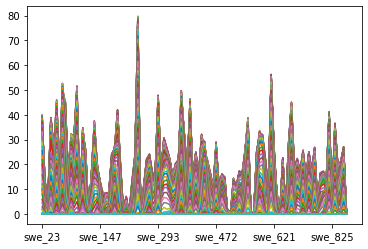

In [8]:
# snow water over time, 100 stations
swe.head(100).T.plot(kind='line', legend=False)

<AxesSubplot:>

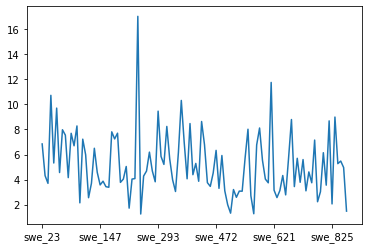

In [9]:
# average
swe.loc['mean'] = swe.mean()
swe.loc['mean'].plot.line()

In [10]:
def filter_days(station_series, days_back=3, plot=False):
    moving_average = np.zeros(len(station_series))
    t = np.arange(len(station_series))
    for i in t:
        moving_average[i] = np.mean(station_series.values[np.max([0, i-days_back]):(i+1)])
    
    noise = station_series.values - moving_average
        
    outlier_dates = (np.argwhere(noise > (3*np.std(noise))).T)[0]

    if plot:
        #print(outlier_dates)
        plt.plot(t, station_series)
        plt.plot(t, moving_average)
        plt.figure()
        plt.title('Noise')
        plt.plot(t, noise)
        
    return outlier_dates

def filter_all_station_days(dff):
    outliers = Counter()
    for idx, station in dff.iterrows():
        o = filter_days(station)
        for day in o:
            outliers[day] += 1

    return outliers

def kitchen_sink(data_type):
    print(translate[data_type])
    
    data = df.filter(regex='^'+data_type, axis=1).copy()
    # First 100 stations
    
    data.loc['mean'] = data.mean()
    
    plt.figure()
    plt.title(translate[data_type])
    filter_days(data.loc['mean'], plot=True)
    outliers = filter_all_station_days(data)
    print('Most likely outlier dates, (day, num_occurances)')
    print(outliers.most_common(10))
    outliers = [o[0] for o in outliers.most_common(10)]
    print('outliers: ', outliers)
    data.head(100).T.plot(title='100 stations over time', kind='line', legend=False, markevery=outliers)
    plt.scatter(outliers, [-2]*len(outliers), color='black')

Snow Water Equivalent (in)
Most likely outlier dates, (day, num_occurances)
[(33, 1830), (3, 304), (71, 76), (79, 73), (5, 70), (25, 60), (10, 54), (51, 54), (55, 31), (4, 30)]
outliers:  [33, 3, 71, 79, 5, 25, 10, 51, 55, 4]


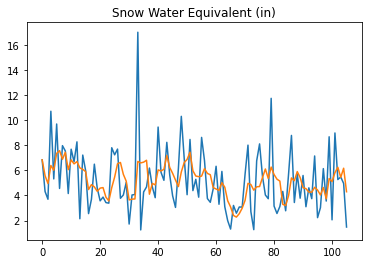

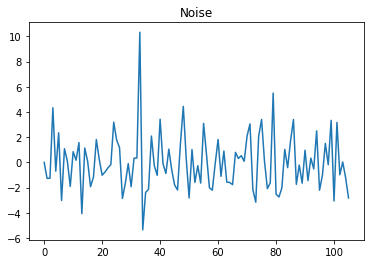

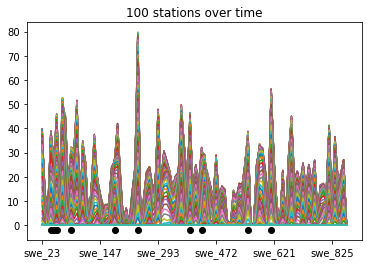

In [11]:
kitchen_sink('swe')

Snow Depth (in)
Most likely outlier dates, (day, num_occurances)
[(33, 1730), (3, 178), (5, 83), (10, 78), (25, 70), (71, 64), (51, 60), (48, 37), (4, 30), (56, 27)]
outliers:  [33, 3, 5, 10, 25, 71, 51, 48, 4, 56]


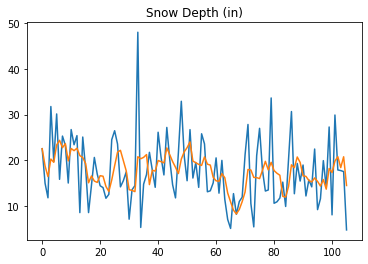

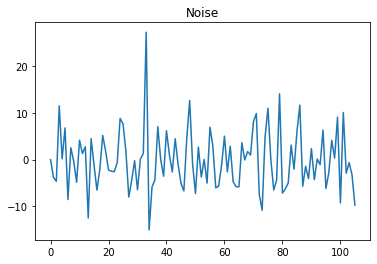

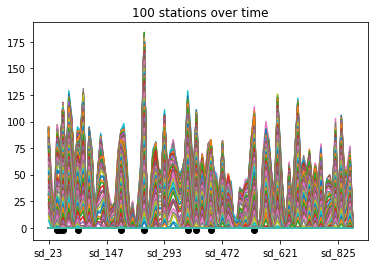

In [12]:
kitchen_sink('sd')

Observed Air Temperature (degrees farenheit)
Most likely outlier dates, (day, num_occurances)
[(16, 194), (8, 146), (2, 112), (61, 87), (40, 78), (24, 72), (105, 62), (30, 46), (49, 41), (18, 40)]
outliers:  [16, 8, 2, 61, 40, 24, 105, 30, 49, 18]


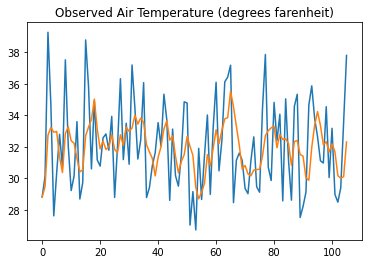

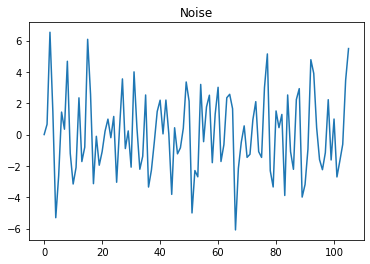

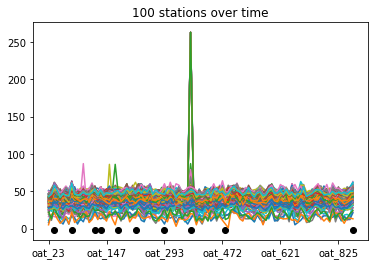

In [13]:
kitchen_sink('oat')

In [14]:
def iForest(data, outliers_fraction=.01):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(scaled)

    scaled = imp.transform(scaled)

    model = IsolationForest(contamination=outliers_fraction)
    model.fit(scaled)
    data['anomaly'] = pd.Series(model.predict(scaled))
    
    a = df.loc[data['anomaly'] == -1] #anomaly
    print('Found {} anomalous stations'.format(len(a.index)))
    plot_data = data.filter(regex='^sd', axis=1)
    plot_a = a.filter(regex='^sd', axis=1)
    plot_data.mean()
    fig, ax = plt.subplots(figsize=(10,6))
    plt.scatter(np.arange(len(plot_data.columns)), plot_data.mean(), label='mean')
    plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[0], label=('anomaly'+str(plot_a.index[0])))
    plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[1], label=('anomaly'+str(plot_a.index[1])))
    plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[2], label=('anomaly'+str(plot_a.index[2])))

    plt.legend()
    
    plt.show();

In [15]:
iForest(df)

ValueError: could not convert string to float: '2011-04-21'

## Statistical outlier anlaysis

Take data from each column of dataset, assume normally distributed, compute mean and SD, examine % of data outside of 95% int.

<AxesSubplot:xlabel='swe_23'>

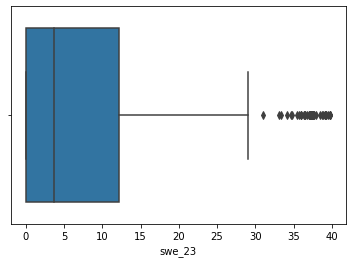

In [18]:
import seaborn as sns
sns.boxplot(x=df['swe_23'])

In [52]:
from scipy import stats

# Remove date column
df2 = df.drop(['Date'], axis=1)

# determine z-value required ot drop datapoint
threshold = 3 #corresponds to 99% of data

z = np.abs(stats.zscore(df2,axis=1)) #get z score of each datapoint within its column

#print when z score is greater than threshold
print(np.where(z > threshold))

(array([   0,    0,    0, ..., 3652, 3652, 3652], dtype=int64), array([ 27,  37,  42, ..., 357, 432, 507], dtype=int64))


(array([1503.,  281.,  387.,  380.,  394.,  436.,  191.,   52.,   17.,
          12.]),
 array([  0. ,  11.4,  22.8,  34.2,  45.6,  57. ,  68.4,  79.8,  91.2,
        102.6, 114. ]),
 <BarContainer object of 10 artists>)

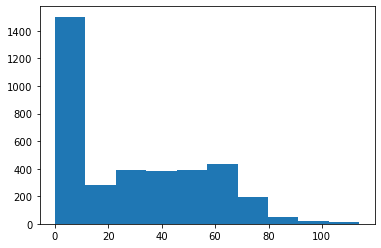

In [74]:
plt.hist(df2.iloc[:,357])

(array([1479.,  309.,  310.,  392.,  453.,  368.,  191.,   80.,   23.,
          48.]),
 array([  0. ,  11.8,  23.6,  35.4,  47.2,  59. ,  70.8,  82.6,  94.4,
        106.2, 118. ]),
 <BarContainer object of 10 artists>)

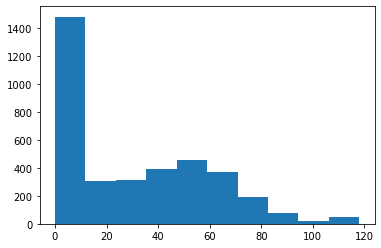

In [71]:
plt.hist(df2.iloc[:,27])

## comments
Appears we are getting a bunch of outliers in columns with a lot of zeros

Checking data - zeros are seasonal. Drop zeros from dataframe.

In [73]:
translate

{'swe': 'Snow Water Equivalent (in)',
 'cswe': 'Change In Snow Water Equivalent (in)',
 'sd': 'Snow Depth (in)',
 'csd': 'Change In Snow Depth (in)',
 'oat': 'Observed Air Temperature (degrees farenheit)'}

In [78]:
# split data frame into content types
swe = df.filter(regex='^swe', axis=1).copy()
sd = df.filter(regex='^sd', axis=1).copy()
oat = df.filter(regex='^oat', axis=1).copy()
cswe = df.filter(regex='^cswe', axis=1).copy()
csd = df.filter(regex='^csd', axis=1).copy()
oat.head()

,oat_23,oat_33,oat_36,oat_38,oat_42,oat_45,oat_62,oat_66,oat_67,oat_84,...,oat_807,oat_817,oat_818,oat_821,oat_825,oat_828,oat_829,oat_853,oat_854,oat_866
0,32,42,40,38,34,31,35,33,33,35,...,36,37,32,40,37,31,38,40,38,45
1,21,31,33,34,24,20,26,22,24,22,...,27,31,25,28,28,21,27,34,27,41
2,22,34,38,36,20,21,27,21,24,27,...,27,34,22,28,26,17,24,36,28,36
3,26,32,32,31,28,25,26,28,29,27,...,32,31,25,29,31,26,30,31,29,37
4,25,28,29,27,30,19,27,28,30,26,...,30,24,29,22,31,25,26,26,26,33


In [127]:
# determine z-value required ot drop datapoint
threshold = 3 #corresponds to 99% of data

z = np.abs(stats.zscore(cswe,axis=1)) #get z score of each datapoint within its column

#print when z score is greater than threshold
print(np.where(z > threshold))

(array([   0,    2,    3, ..., 3650, 3651, 3651], dtype=int64), array([31, 31,  3, ..., 42, 42, 74], dtype=int64))


In [128]:
k=np.where(z > threshold)

In [129]:
x=234
print(k[0][x],k[1][x])

213 33


In [133]:
cswe.iloc[:,33].describe()

count    3653.000000
mean       -0.008514
std         0.583378
min        -3.100000
25%         0.000000
50%         0.000000
75%         0.100000
max         3.200000
Name: cswe_228, dtype: float64

In [134]:
cswe.iloc[213,33]

1.0

(array([   9.,   55.,  146.,  146., 2103.,  945.,  196.,   35.,   14.,
           4.]),
 array([-3.1 , -2.47, -1.84, -1.21, -0.58,  0.05,  0.68,  1.31,  1.94,
         2.57,  3.2 ]),
 <BarContainer object of 10 artists>)

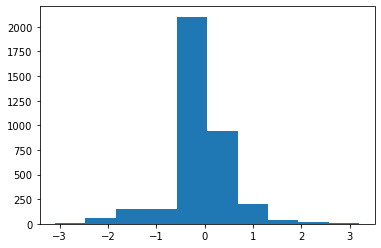

In [135]:
plt.hist(cswe.iloc[:,33])

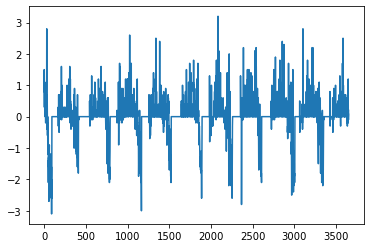

In [136]:
plt.plot(cswe.iloc[:,33])

## comments

We see that the change in x columns do fine (since they're mean 0).

In [137]:
dfNan = df.replace(0, np.nan)


In [138]:
dfNan.head()

,Date,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
0,2011-04-21,33.4,0.5,86.0,-1.0,32.0,11.6,-0.5,27.0,-2.0,...,23.3,-0.1,57.0,-5.0,38.0,NaN,NaN,NaN,NaN,45.0
1,2011-04-22,34.2,0.8,93.0,7.0,21.0,10.8,-0.8,25.0,-2.0,...,23.8,0.5,61.0,4.0,27.0,NaN,NaN,NaN,NaN,41.0
2,2011-04-23,34.7,0.5,92.0,-1.0,22.0,10.4,-0.4,24.0,-1.0,...,23.6,-0.2,60.0,-1.0,28.0,NaN,NaN,NaN,NaN,36.0
3,2011-04-24,35.4,0.7,92.0,NaN,26.0,10.7,0.3,29.0,5.0,...,24.2,0.6,64.0,4.0,29.0,0.3,0.3,2.0,2.0,37.0
4,2011-04-25,35.7,0.3,94.0,2.0,25.0,11.5,0.8,35.0,6.0,...,24.8,0.6,69.0,5.0,26.0,0.4,0.1,2.0,NaN,33.0


In [139]:

# Remove date column
dfOutlier = dfNan.drop(['Date'], axis=1)

# determine z-value required ot drop datapoint
threshold = 3 #corresponds to 99% of data

z = np.abs(stats.zscore(dfOutlier,axis=1,nan_policy="omit")) #get z score of each datapoint within its column

#print when z score is greater than threshold
print(np.where(z > threshold))

(array([   0,    0,    0, ..., 3652, 3652, 3652], dtype=int64), array([ 27,  37,  62, ...,  72, 167, 282], dtype=int64))


In [148]:
k=np.where(z > threshold)
print(len(k[1]))

7410


In [159]:
dfOutlier.iloc[:,27].describe()

count    2526.000000
mean       43.574426
std        25.652788
min         1.000000
25%        22.000000
50%        44.000000
75%        61.000000
max       118.000000
Name: sd_45, dtype: float64

(array([378., 301., 332., 352., 493., 358., 161.,  80.,  23.,  48.]),
 array([  1. ,  12.7,  24.4,  36.1,  47.8,  59.5,  71.2,  82.9,  94.6,
        106.3, 118. ]),
 <BarContainer object of 10 artists>)

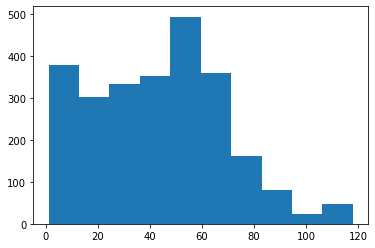

In [161]:
plt.hist(dfOutlier.iloc[:,27])

In [152]:
dfOutlier.iloc[:,27]

0       112.0
1       113.0
2       113.0
3       114.0
4       114.0
        ...  
3648     52.0
3649     52.0
3650     55.0
3651     54.0
3652     55.0
Name: sd_45, Length: 3653, dtype: float64